# Fraud Detection

## Data Analysis

In [27]:
import glob
import pandas as pd
import numpy as np

input_filenames = sorted(glob.glob('fraud_detection/*.Inputs'))
target_filenames = sorted(glob.glob('fraud_detection/*.Targets'))

df = pd.DataFrame()
for input_file, target_file in zip(input_filenames, target_filenames):
    df = df.append(pd.read_csv(input_file))
    df['fraud'] = pd.read_csv(target_file)

df.head()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
0,25.90,BELLSOUTH.NET,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,0,FL,25.90,331
1,38.85,COMCAST.NET,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,0,TX,38.85,750
2,38.85,HOTMAIL.COM,2,0,5183,19,1,0,0,0,0,1,0.0,1,1,0,0,VA,38.85,222
3,24.95,GMAIL.COM,0,0,3822,16,0,0,0,0,0,1,0.0,1,1,0,0,CA,24.95,946
4,20.72,LEVEL3.COM,3,0,3536,8,1,1,1,1,0,1,0.0,1,1,0,0,CO,20.72,805


### Dataset Profiling Report

In [28]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(output_file="ProfilingResult.html")

In [29]:
# profile

### Rows containing null values

In [30]:
df[pd.isnull(df).any(axis=1)]

,amount,domain1,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,hour2,indicator1,indicator2,state1,total,zip1
63375,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
6991,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63292,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
63317,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63358,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857
63302,38.85,NaN,3,0,-2459,38,24,0,1,1,0,0,0.0,16,16,0,0,NY,38.85,105
85213,38.85,AOL.COM,2,0,-676,8,2,0,1,1,0,4,NaN,19,19,0,0,AZ,38.85,857


## Data Preprocessing

Drop highly correlated columns

In [5]:
clean_df = df.drop(columns=['hour2', 'domain1', 'total'])
clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,FL,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,TX,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,VA,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,CA,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,CO,805


In [6]:
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()

In [7]:
clean_df['state1'] = clean_df['state1'].astype('category')
clean_df['state1'] = clean_df['state1'].cat.codes

clean_df.head()

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,fraud,hour1,indicator1,indicator2,state1,zip1
0,25.90,3,1,3878,8,0,1,0,1,0,1,0.0,0,0,0,11,331
1,38.85,2,1,-6330,21,1,0,1,1,0,1,0.0,0,0,0,45,750
2,38.85,2,0,5183,19,1,0,0,0,0,1,0.0,1,0,0,47,222
3,24.95,0,0,3822,16,0,0,0,0,0,1,0.0,1,0,0,6,946
4,20.72,3,0,3536,8,1,1,1,1,0,1,0.0,1,0,0,7,805


In [8]:
clean_df.shape

(99305, 17)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002998C280828>]]


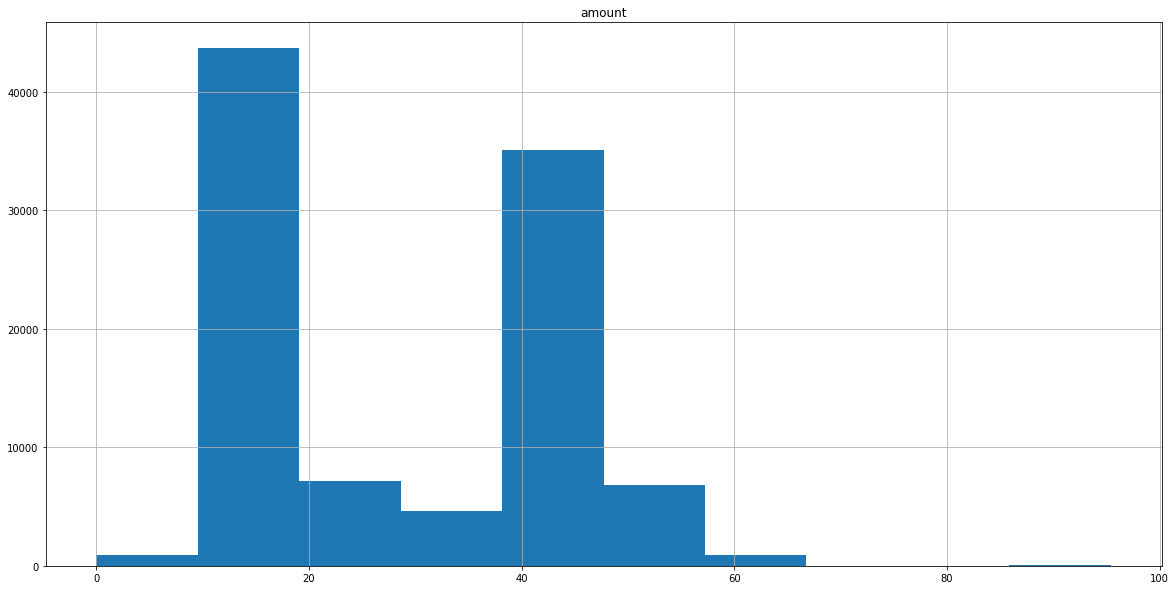

In [45]:
hist = clean_df.hist(column=['amount'], figsize=(20,10))
print (hist)

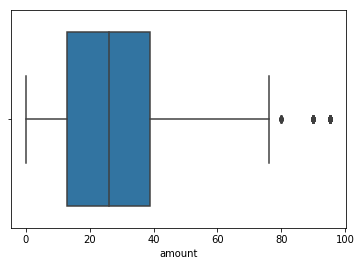

In [46]:
import seaborn as sns

# Same as using IQR guys
sns.boxplot(x=clean_df['amount'])

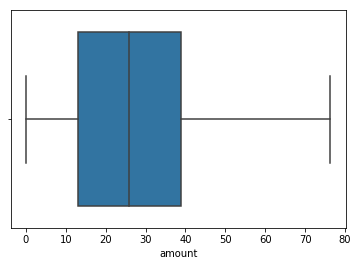

In [50]:
Q1 = clean_df['amount'].quantile(0.25)
Q3 = clean_df['amount'].quantile(0.75)
IQR = Q3 - Q1

outlier_removed_df = clean_df
filter = (outlier_removed_df['amount'] >= Q1 - 1.5 * IQR) & (outlier_removed_df['amount'] <= Q3 + 1.5 *IQR)
outlier_removed_df = outlier_removed_df.loc[filter] 

sns.boxplot(x=outlier_removed_df['amount'])

In [54]:
clean_df = outlier_removed_df
outlier_removed_df.shape

(99229, 17)

## Split dataset

In [55]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(columns=['fraud'])
y = clean_df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [56]:
X_train

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1
45763,38.85,3,0,3187,17,0,0,0,0,0,1,20,0,0,22,207
18949,38.85,2,1,-5589,9,0,0,1,1,0,2,22,0,0,40,190
22879,11.01,3,0,-252,10,6,1,0,0,0,2,14,0,0,35,891
68142,10.36,3,1,3128,13,0,1,1,0,0,2,10,0,0,5,853
57772,38.85,3,1,1282,7,2,1,0,0,0,3,16,0,0,12,300
4452,11.01,3,0,4095,12,4,1,1,0,0,1,17,0,0,25,551
10840,12.95,3,0,889,21,3,0,0,1,0,1,22,0,0,6,956
5695,10.36,3,0,1805,26,4,0,0,0,0,1,22,0,0,37,442
8671,38.85,3,0,-2608,23,2,0,1,1,0,1,23,0,0,7,802
7298,12.95,3,0,-7685,6,1,0,1,1,0,2,0,0,0,6,951


In [57]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(df_train)
# profile.to_file(output_file="PreprocessedProfilingResult.html")

## Oversampling & Undersampling

### Oversampling Approach

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_train_oversampling = X_train
y_train_oversampling = y_train
X_res, y_res = smote.fit_resample(X_train_oversampling, y_train_oversampling)

dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)
dataset_res.shape
dataset_res

array([[3.88500000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        2.20000000e+01, 2.07000000e+02, 0.00000000e+00],
       [3.88500000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        4.00000000e+01, 1.90000000e+02, 0.00000000e+00],
       [1.10100000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        3.50000000e+01, 8.91000000e+02, 0.00000000e+00],
       ...,
       [1.09382726e+01, 3.00000000e+00, 1.00000000e+00, ...,
        1.56006645e+01, 9.39610106e+02, 1.00000000e+00],
       [1.13375441e+01, 2.33767431e+00, 0.00000000e+00, ...,
        1.15716261e+01, 9.35935346e+02, 1.00000000e+00],
       [2.49018196e+01, 2.51041838e+00, 5.10418377e-01, ...,
        3.07916325e+01, 2.23853979e+01, 1.00000000e+00]])

In [59]:
dataset_res[0]

array([3.885e+01, 3.000e+00, 0.000e+00, 3.187e+03, 1.700e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+01,
       0.000e+00, 0.000e+00, 2.200e+01, 2.070e+02, 0.000e+00])

In [60]:
columns = X.columns.tolist()
columns.append('fraud')

oversampled_df = pd.DataFrame(dataset_res, columns=columns)
oversampled_df

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
0,38.850000,3.000000,0.000000,3187.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,22.000000,207.000000,0.0
1,38.850000,2.000000,1.000000,-5589.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,22.000000,0.000000,0.000000,40.000000,190.000000,0.0
2,11.010000,3.000000,0.000000,-252.000000,10.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.000000,35.000000,891.000000,0.0
3,10.360000,3.000000,1.000000,3128.000000,13.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000,5.000000,853.000000,0.0
4,38.850000,3.000000,1.000000,1282.000000,7.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,16.000000,0.000000,0.000000,12.000000,300.000000,0.0
5,11.010000,3.000000,0.000000,4095.000000,12.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,25.000000,551.000000,0.0
6,12.950000,3.000000,0.000000,889.000000,21.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.000000,0.000000,0.000000,6.000000,956.000000,0.0
7,10.360000,3.000000,0.000000,1805.000000,26.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,37.000000,442.000000,1.0
8,38.850000,3.000000,0.000000,-2608.000000,23.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.000000,802.000000,0.0
9,12.950000,3.000000,0.000000,-7685.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,951.000000,0.0


In [61]:
# import pandas_profiling

# profile = pandas_profiling.ProfileReport(oversampled_df)
# profile.to_file(output_file="OversampledProfilingResult.html")

In [62]:
oversampled_df['fraud'].value_counts()

1.0    65458
0.0    65458
Name: fraud, dtype: int64

### Undersampling Approach

In [63]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours 
from sklearn.datasets import make_classification
from collections import Counter

X_train_undersampling = X_train
y_train_undersampling = y_train
# print (y_train_undersampling)
print (X_train_undersampling.shape)

renn = RepeatedEditedNearestNeighbours (sampling_strategy='majority')
X_res, y_res = renn.fit_resample(X_train_undersampling, y_train_undersampling)
# print (y)
print (X_res.shape)

(74421, 16)
(40486, 16)


In [64]:
dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)

undersampled_df = pd.DataFrame(dataset_res, columns=columns)
undersampled_df

,amount,field1,field2,field3,field4,field5,flag1,flag2,flag3,flag4,flag5,hour1,indicator1,indicator2,state1,zip1,fraud
0,38.85,2.0,1.0,-5589.0,9.0,0.0,0.0,1.0,1.0,0.0,2.0,22.0,0.0,0.0,40.0,190.0,0.0
1,11.01,3.0,0.0,-252.0,10.0,6.0,1.0,0.0,0.0,0.0,2.0,14.0,0.0,0.0,35.0,891.0,0.0
2,38.85,3.0,1.0,1282.0,7.0,2.0,1.0,0.0,0.0,0.0,3.0,16.0,0.0,0.0,12.0,300.0,0.0
3,38.85,3.0,0.0,-2608.0,23.0,2.0,0.0,1.0,1.0,0.0,1.0,23.0,0.0,0.0,7.0,802.0,0.0
4,12.95,3.0,1.0,2184.0,9.0,9.0,1.0,1.0,1.0,1.0,1.0,16.0,0.0,0.0,35.0,890.0,0.0
5,12.95,3.0,0.0,-476.0,9.0,9.0,1.0,1.0,0.0,0.0,4.0,16.0,0.0,0.0,35.0,891.0,0.0
6,49.95,3.0,0.0,-643.0,16.0,0.0,0.0,1.0,1.0,0.0,1.0,23.0,0.0,0.0,22.0,218.0,0.0
7,12.95,3.0,1.0,6236.0,22.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,1.0,0.0,19.0,402.0,0.0
8,12.95,0.0,0.0,-9121.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,21.0,21.0,0.0
9,10.95,0.0,0.0,5658.0,6.0,0.0,1.0,1.0,0.0,0.0,2.0,8.0,0.0,0.0,33.0,71.0,0.0


In [ ]:
undersampled_df['fraud'].value_counts()

0.0    31523
1.0     8963
Name: fraud, dtype: int64

In [ ]:
y_train.value_counts()

0.0    65458
1.0     8963
Name: fraud, dtype: int64

### Hybrid Approach

In [ ]:
from imblearn.combine import SMOTEENN

X_train_combine = X_train
y_train_combine = y_train

print (X_train_combine.shape)

sme = SMOTEENN(sampling_strategy='minority', ratio=1)
X_res, y_res = sme.fit_resample(X_train_combine, y_train_combine)

print (X_res.shape)

(74421, 16)


In [ ]:
dataset_res = []
for i in range(len(y_res)):
    dataset_res.append(np.append(X_res[i], y_res[i]))

dataset_res = np.asarray(dataset_res)

combined_df = pd.DataFrame(dataset_res, columns=columns)
combined_df

In [ ]:
combined_df['fraud'].value_counts()

## Model and Evaluation

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score

# X = oversampled_df.drop(columns=['fraud']).to_numpy()
# y = oversampled_df['fraud']

# model = MultinomialNB(alpha=1e-10)

# kf = StratifiedKFold(n_splits=10)
# for train_index, test_index in kf.split(X, y):
#     X_train_model, X_validation_model = X[train_index], X[test_index]
#     y_train_model, y_validation_model = y[train_index], y[test_index]
#     model.fit(X_train_model, y_train_model)
#     predict = model.predict(X_validation_model)
#     print ("Accuracy\t", accuracy_score(y_validation_model, predict))

In [ ]:
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = combined_df.drop(columns=['fraud']).to_numpy()
y = combined_df['fraud']

model = Sequential()
model.add(Dense(10, input_dim=16, kernel_initializer='normal', activation='linear'))
model.add(Dense(5, kernel_initializer='normal', activation='linear'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mae'])

kf = StratifiedKFold(n_splits=10)
for train_index, test_index in kf.split(X, y):
    X_train_model, X_validation_model = X[train_index], X[test_index]
    y_train_model, y_validation_model = y[train_index], y[test_index]
    history = model.fit(X_train_model, y_train_model, epochs=200, batch_size=10,  verbose=1)
    predict = model.predict_classes(X_validation_model)
    print ("Accuracy\t", accuracy_score(y_validation_model, predict))
    print(classification_report(y_validation_model, predict, target_names=['0', '1']))
    show_history(history)

In [ ]:
# from sklearn.metrics import classification_report

# predict_test = model.predict_classes(X_test)
# print ("Accuracy\t", accuracy_score(y_test, predict_test))
# print(classification_report(y_test, predict_test, target_names=['0', '1']))